In [30]:
import json
import pandas as pd
from math import sin, sqrt, ceil
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


replace = {
    'm_fwd': 'Alpha Forward',
    'm_rev': 'Alpha Reverse',
    'm_swr': 'Alpha SWR',
    'm_freq': 'Alpha Frequency',
    'm_temp': 'Alpha Temperature',
    't_fwd': 'MC-200 Forward',
    't_rev': 'MC-200 Reverse',
    't_swr': 'MC-200 SWR',
}


def load_file(*files: str):
    data = {}
    for filename in files:
        with open(filename) as f:
            for line in f.readlines():
                if line.startswith('//'):
                    continue

                d = json.loads(line)

                # drop all the metadata and the raw sample values
                record = {
                    **d['location'],
                    # **d['data'],
                }

                def sim(a, b):
                    diff = (b - a)
                    return (diff / a) * 100

                record['error_fwd'] = sim(d['data']['m_fwd'], d['data']['t_fwd'])
                record['error_rev'] = sim(d['data']['m_rev'], d['data']['t_rev'])
                record['error_swr'] = sim(d['data']['m_swr'], d['data']['t_swr'])

                for k, v in replace.items():
                    record[v] = d['data'][k]

                location = d['location']
                key = f"{location['ant']}:{location['freq']}:{location['power']}"
                data[key] = record

    df = pd.DataFrame.from_records(list(data.values()))

    return df

freqs = [
    '01800000',
    '03500000',
    '07000000',
    '10100000',
    '14000000',
    '18068000',
    '21000000',
    '24890000',
    '28000000',
    '50000000',
]

In [3]:
df = load_file('data.jsonl')
df = df.query('ant == 1')
# df = df.query('freq == "14000000"')
# df = df.query('freq == "18068000"')
df = df.query('freq == "10100000"')
# df = df.query('freq == "01800000"')
# df = df.query('power == "020"')
# df = df.sort_values('error_swr', ascending=False)
df = df.sort_values(['ant', 'freq', 'power'])

df = df[['ant', 'freq', 'power', 'error_fwd', 'MC-200 Forward', 'Alpha Forward', 'error_rev', 'MC-200 Reverse', 'Alpha Reverse', 'error_swr', 'MC-200 SWR', 'Alpha SWR']]
df.style.format({
    'error_swr':'{:0.1f}%',
    'error_fwd':'{:0.1f}%',
    'error_rev':'{:0.1f}%',
    'MC-200 Forward':'{:0.2f}',
    'Alpha Forward':'{:0.2f}',
    'MC-200 Reverse':'{:0.3f}',
    'Alpha Reverse':'{:0.3f}',
    'MC-200 SWR':'{:0.2f}',
    'Alpha SWR':'{:0.2f}'
})


,ant,freq,power,error_fwd,MC-200 Forward,Alpha Forward,error_rev,MC-200 Reverse,Alpha Reverse,error_swr,MC-200 SWR,Alpha SWR
73,1,10100000,5,7.7%,5.19,4.82,18422.4%,0.064,0.000,22.9%,1.25,1.02
75,1,10100000,10,3.1%,11.09,10.75,20446.6%,0.146,0.001,23.9%,1.26,1.02
77,1,10100000,15,2.8%,15.22,14.80,20713.3%,0.200,0.001,23.9%,1.26,1.02
72,1,10100000,20,5.3%,20.69,19.65,21374.5%,0.266,0.001,23.6%,1.26,1.02
74,1,10100000,25,6.5%,27.11,25.46,20683.4%,0.339,0.002,23.2%,1.25,1.02
76,1,10100000,30,6.1%,31.60,29.79,20238.2%,0.387,0.002,23.0%,1.25,1.02
78,1,10100000,35,8.3%,37.50,34.63,20143.2%,0.451,0.002,22.7%,1.25,1.02
79,1,10100000,40,8.1%,42.82,39.61,20155.0%,0.507,0.003,22.5%,1.24,1.02
80,1,10100000,50,8.9%,56.50,51.90,20366.0%,0.654,0.003,22.2%,1.24,1.02
81,1,10100000,60,9.6%,65.24,59.51,20657.6%,0.750,0.004,22.1%,1.24,1.02


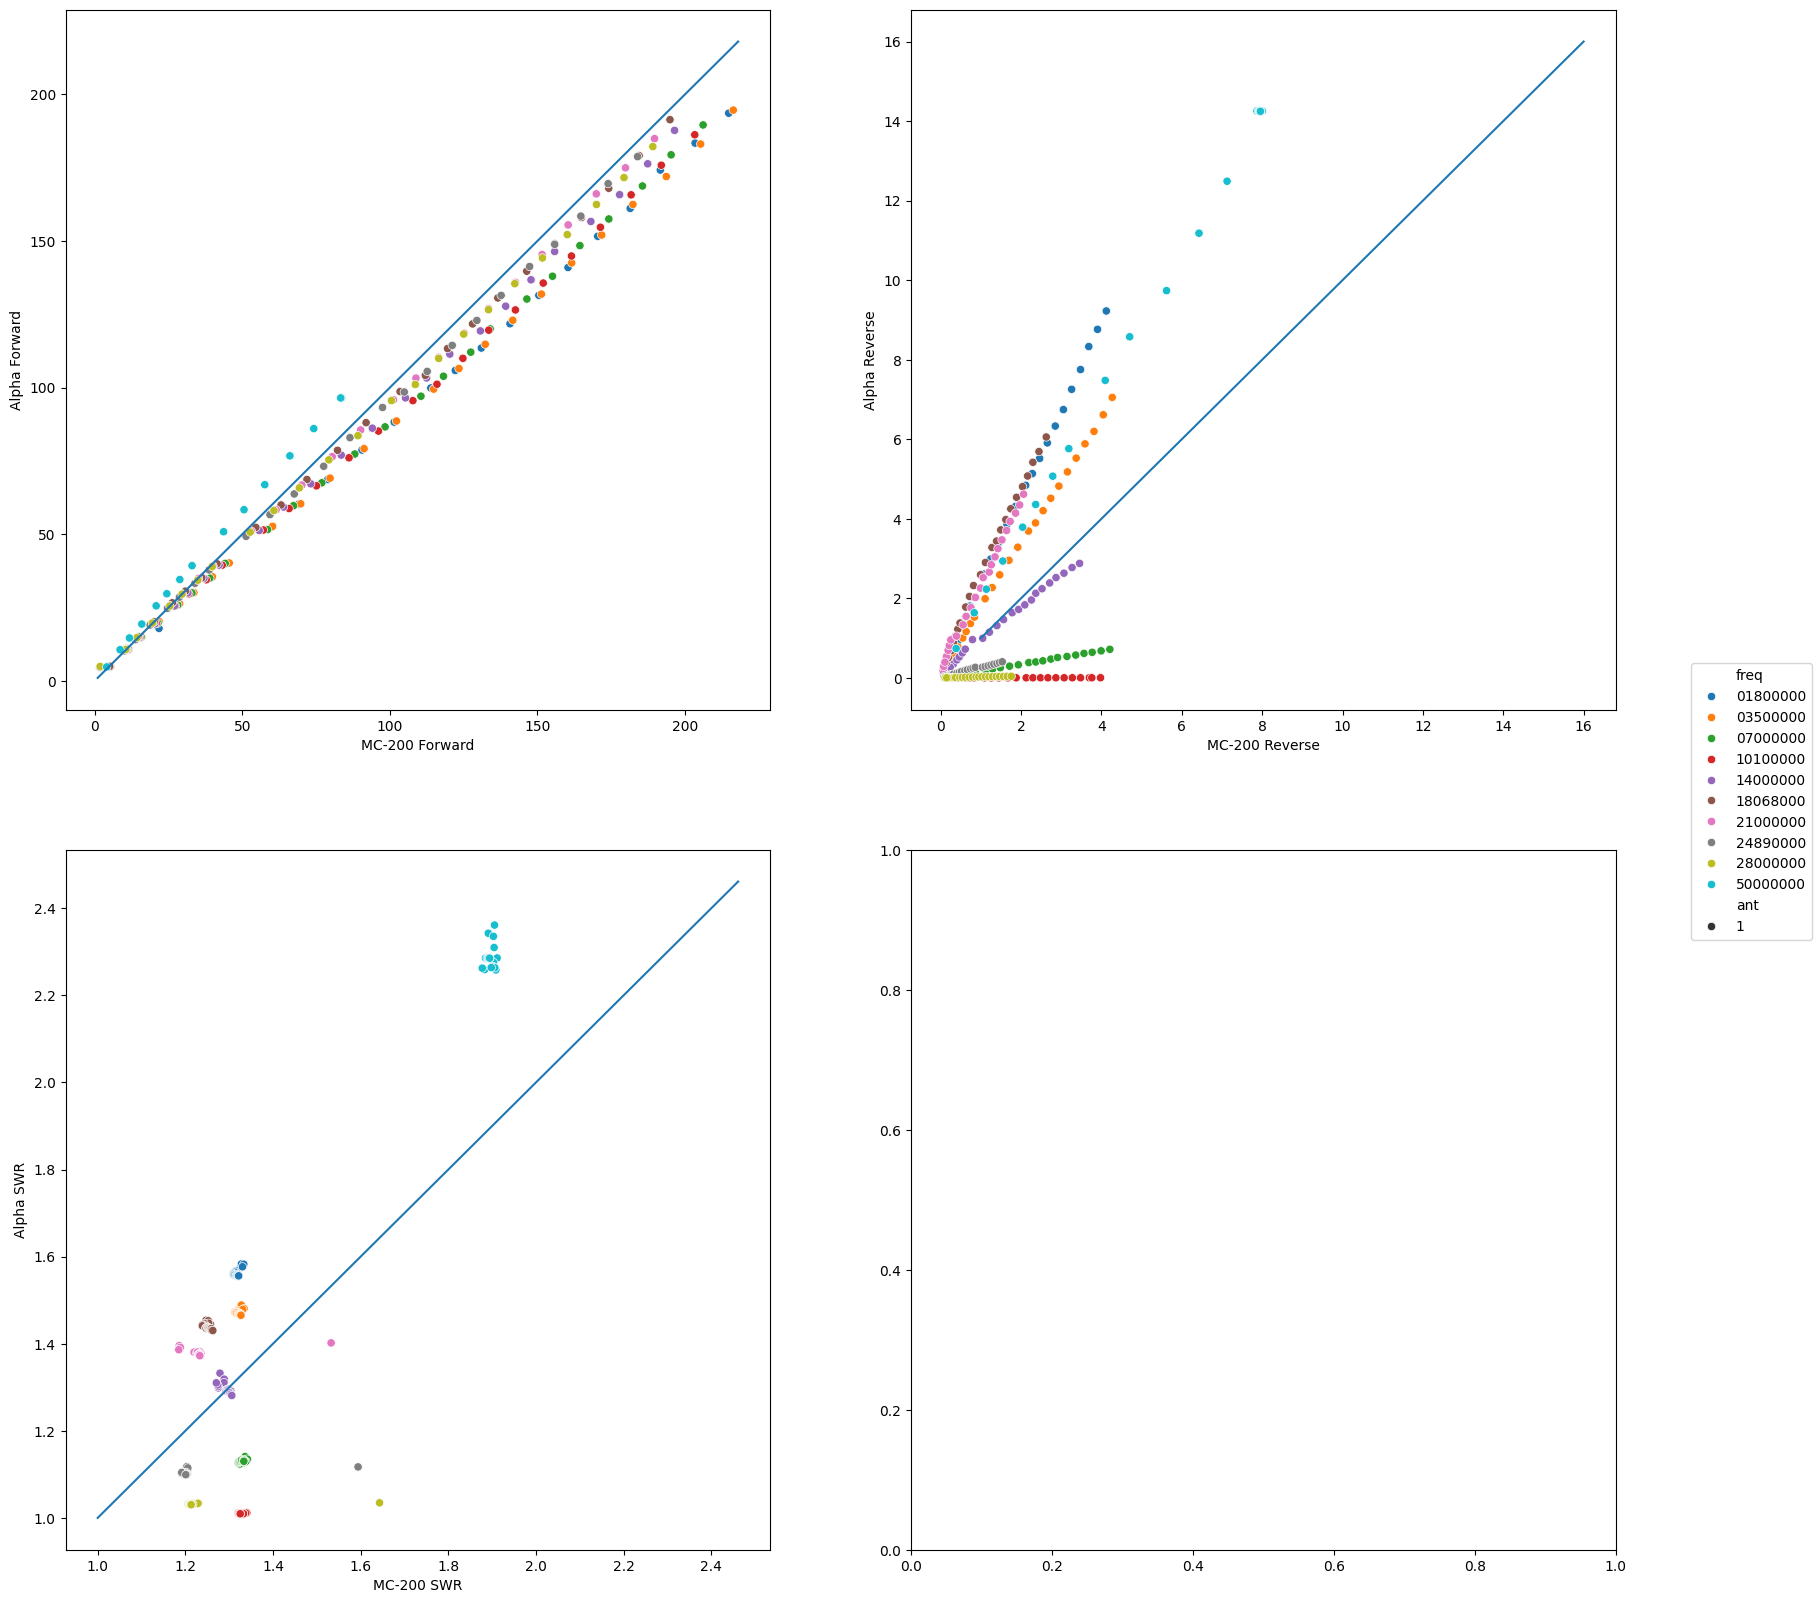

In [180]:
df = load_file('data2.jsonl')

df = df.query('ant == 1')
# df = df.query('freq != "50000000"')

fig, ax = plt.subplots(2, 2, figsize=(20, 20))


def make_line(a, top):
    line = pd.DataFrame.from_records([{'x': i, 'y': i} for i in [1, top]])
    sns.lineplot(line, x='x', y='y', ax=a)


sns.scatterplot(df, x='MC-200 Forward', y='Alpha Forward', hue='freq', style='ant', ax=ax[0, 0])
make_line(ax[0, 0], int(ceil(max(df['MC-200 Forward'].max(), df['Alpha Forward'].max()))) + 1)

sns.scatterplot(df, x='MC-200 Reverse', y='Alpha Reverse', hue='freq', style='ant', ax=ax[0, 1])
make_line(ax[0, 1], int(ceil(max(df['MC-200 Reverse'].max(), df['Alpha Reverse'].max()))) + 1)

sns.scatterplot(df, x='MC-200 SWR', y='Alpha SWR', hue='freq', style='ant', ax=ax[1, 0])
make_line(ax[1, 0], max(df['MC-200 SWR'].max(), df['Alpha SWR'].max()) + 0.1)

handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

ax[0, 0].get_legend().remove()
ax[0, 1].get_legend().remove()
ax[1, 0].get_legend().remove()


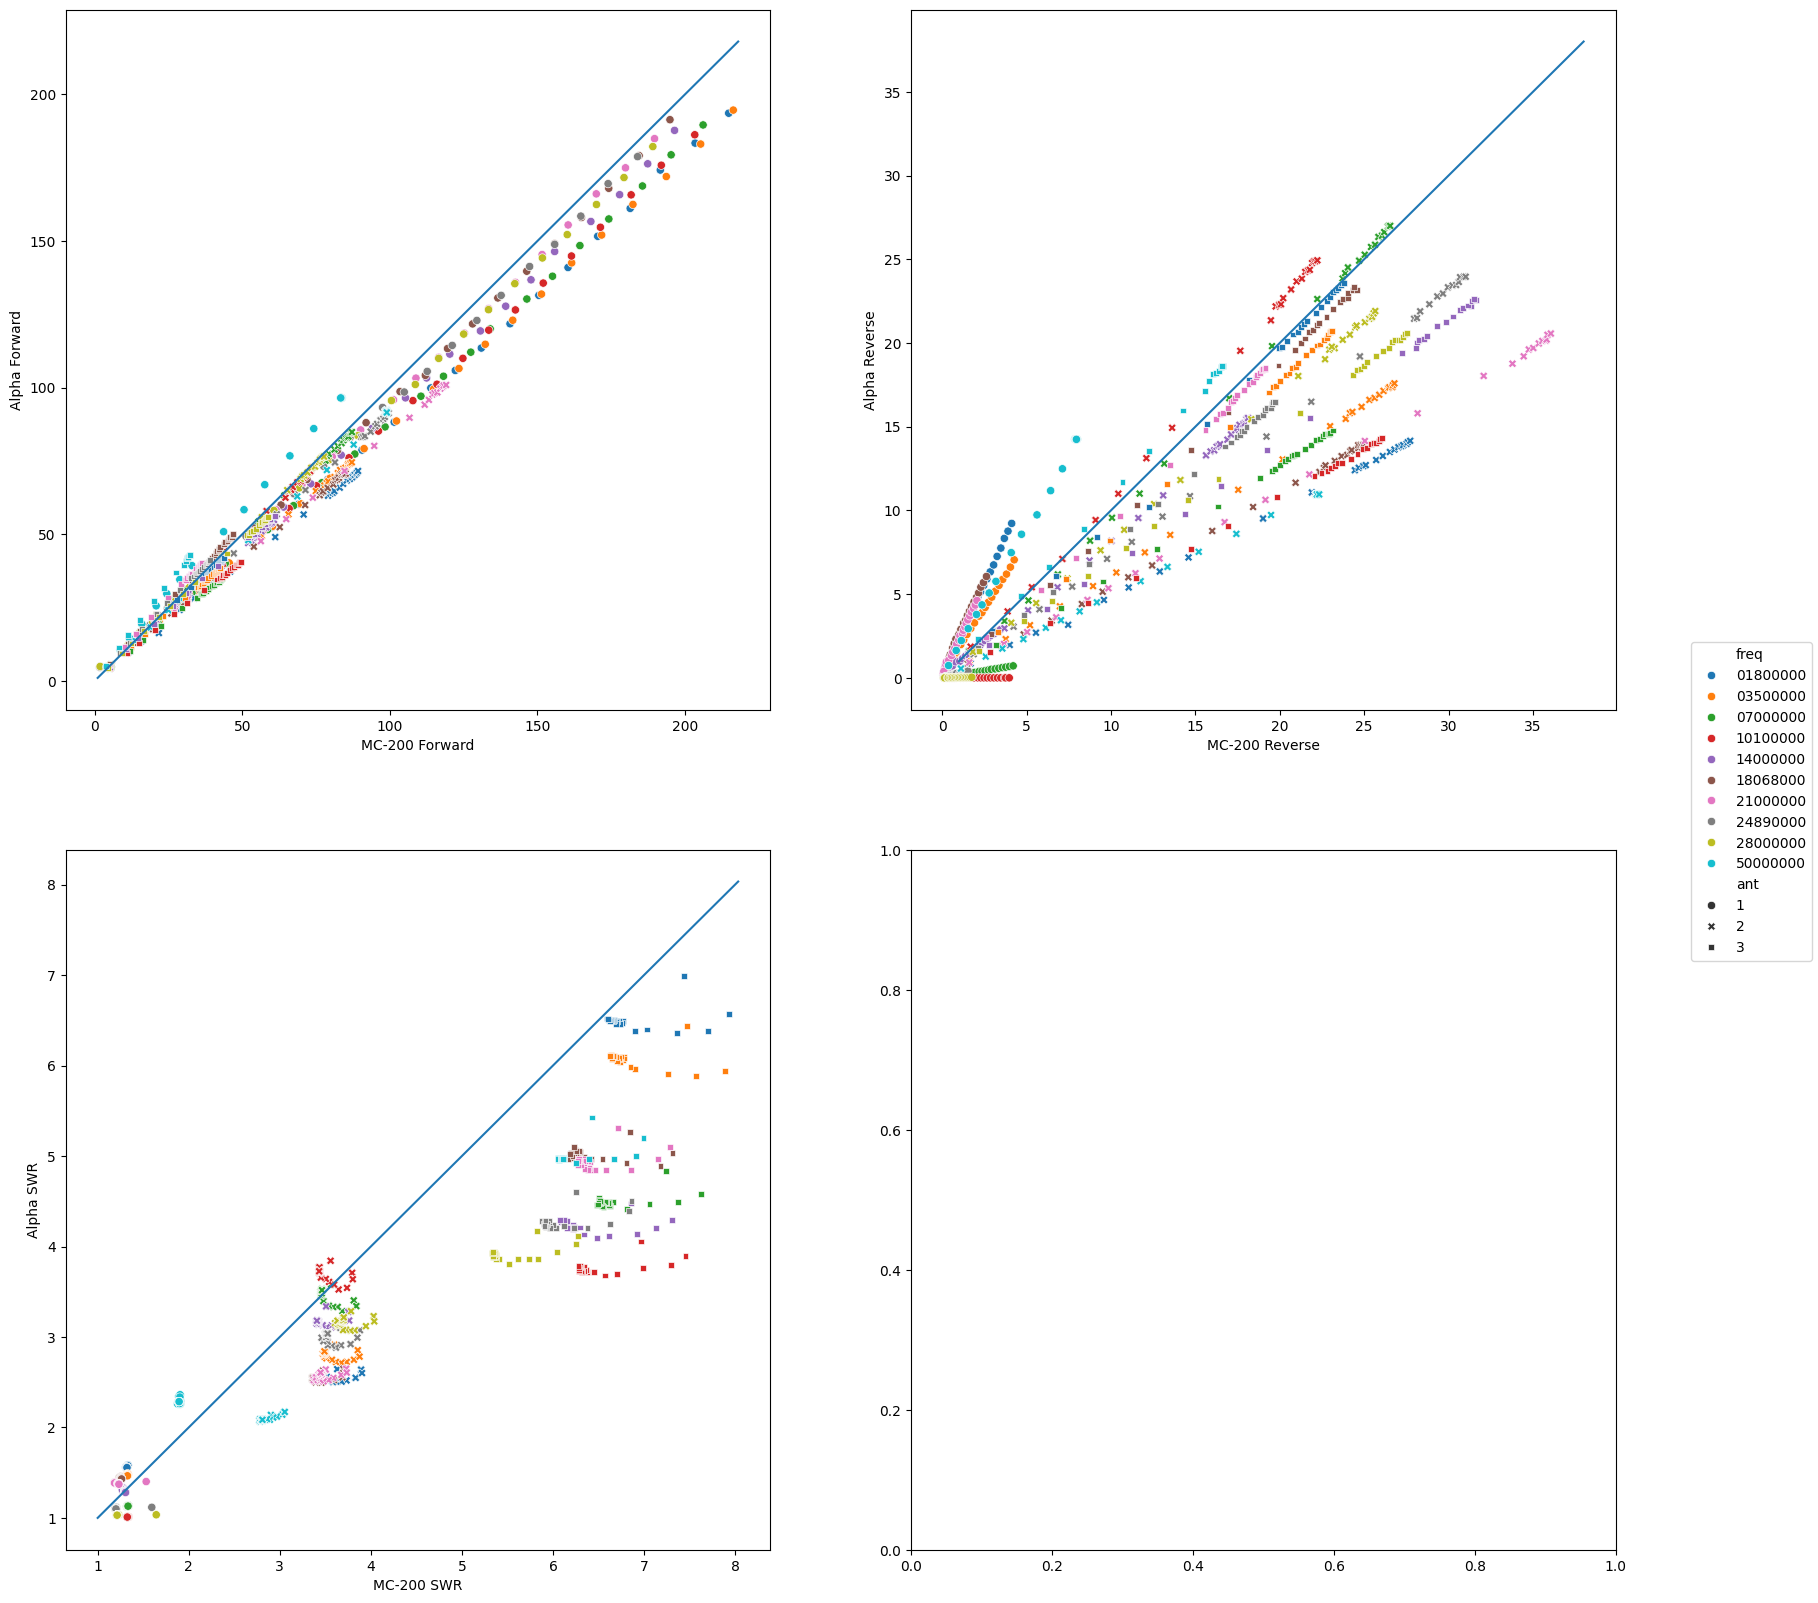

In [179]:
df = load_file('data2.jsonl')

# df = df.query('ant != 1')
# df = df.query('freq != "50000000"')

fig, ax = plt.subplots(2, 2, figsize=(20, 20))


def make_line(a, top):
    line = pd.DataFrame.from_records([{'x': i, 'y': i} for i in [1, top]])
    sns.lineplot(line, x='x', y='y', ax=a)


sns.scatterplot(df, x='MC-200 Forward', y='Alpha Forward', hue='freq', style='ant', ax=ax[0, 0])
make_line(ax[0, 0], int(ceil(max(df['MC-200 Forward'].max(), df['Alpha Forward'].max()))) + 1)

sns.scatterplot(df, x='MC-200 Reverse', y='Alpha Reverse', hue='freq', style='ant', ax=ax[0, 1])
make_line(ax[0, 1], int(ceil(max(df['MC-200 Reverse'].max(), df['Alpha Reverse'].max()))) + 1)

sns.scatterplot(df, x='MC-200 SWR', y='Alpha SWR', hue='freq', style='ant', ax=ax[1, 0])
make_line(ax[1, 0], max(df['MC-200 SWR'].max(), df['Alpha SWR'].max()) + 0.1)

handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

ax[0, 0].get_legend().remove()
ax[0, 1].get_legend().remove()
ax[1, 0].get_legend().remove()


In [176]:
df = load_file('data.jsonl')

df = df.sort_values(['ant', 'freq', 'power'])

df['SWR'] = df['error_swr']
df['FWD'] = df['error_fwd']
df['REV'] = df['error_rev']

df['MC-200 F'] = df['MC-200 Forward']
df['Alpha F'] = df['Alpha Forward']
df['MC-200 R'] = df['MC-200 Reverse']
df['Alpha R'] = df['Alpha Reverse']
df['MC-200 S'] = df['MC-200 SWR']
df['Alpha S'] = df['Alpha SWR']

df = df.filter(['ant', 'freq', 'power', 'FWD', 'MC-200 F', 'Alpha F', 'REV', 'MC-200 R', 'Alpha R', 'SWR', 'MC-200 S', 'Alpha S'], axis=1)

html = ''

html += '''
<style>
    table {
        border-collapse: collapse;
    }
    th {
        background-color: #BBBBBB;
        # color: white;
        border: solid 1px #333;
        padding-left: 5px;
        padding-right: 5px;
    }
    td {
        border-right: solid 1px #333; 
        border-left: solid 1px #333;
        padding-left: 15px;
        padding-right: 15px;
    }
</style>
'''

pages = []
for ant in [1, 2, 3]:
    outer = df.query(f'ant == {ant}')
    for freq in freqs:
        inner = outer.query(f'freq == "{freq}"')
        page = ''
        page += f'<h1>{freq}, Ant {ant}</h1>'

        summary = pd.DataFrame([
            ('FWD:', f"{inner['FWD'].median():0.2f}%", f"{inner['FWD'].std():0.2f}%"),
            ('REV:', f"{inner['REV'].median():0.2f}%", f"{inner['REV'].std():0.2f}%"),
            ('SWR:', f"{inner['SWR'].median():0.2f}%", f"{inner['SWR'].std():0.2f}%"),
        ], columns=['', 'median', 'std'])
        
        page += summary.style.hide(axis="index").to_html(index=False)

        page += '<br/>'

        output = inner.style\
        .hide(subset=['ant', 'freq'], axis=1)\
        .hide(axis="index")\
        .set_properties(['FWD', 'REV', 'SWR'], **{'background-color': '#DDDDDD'})\
        .set_properties(['power'], **{'background-color': '#FFFF98'})\
        .format({
            'FWD':'{:0.1f}%',
            'REV':'{:0.1f}%',
            'SWR':'{:0.1f}%',
            'MC-200 F':'{:0.2f}',
            'Alpha F':'{:0.2f}',
            'MC-200 R':'{:0.3f}',
            'Alpha R':'{:0.3f}',
            'MC-200 S':'{:0.2f}',
            'Alpha S':'{:0.2f}'
        })
        page += output.to_html()
        pages.append(page)

pagebreak = '\n<div style="page-break-before: always;"/>\n'
html += pagebreak.join(pages)

with open('output/tables.html', 'w') as f:
    f.write(html)
